<a href="https://colab.research.google.com/github/vibhuvanjari-Kellogg/classification-modeling-Titanic/blob/main/Mod_5_Titanic_Part_2_Tree_and_Forest_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Link to access this code - https://colab.research.google.com/drive/1OX0dFDrMRPJfsf1d39qfpUsUGJkhzUt-#scrollTo=y4rZOE0FzvrZ

Data taken from - https://www.kaggle.com/c/titanic/data

Part 1: https://colab.research.google.com/drive/1ojYP9ur_Mpa1GtjdkkPL4PsNwrxLD_ir?usp=sharing

### Import modules and data files

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# To ensure all columns are displayed when calling data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_merged = pd.read_csv('df_merged.csv')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        1309 non-null   int64  
 1   Survived           891 non-null    float64
 2   Pclass             1309 non-null   int64  
 3   Name               1309 non-null   object 
 4   Sex                1309 non-null   object 
 5   Age                1309 non-null   float64
 6   SibSp              1309 non-null   int64  
 7   Parch              1309 non-null   int64  
 8   Ticket             1309 non-null   object 
 9   Fare               1309 non-null   float64
 10  Embarked           1309 non-null   object 
 11  TestYes            1309 non-null   int64  
 12  Ticket_Number      1309 non-null   int64  
 13  Ticket_Group       1309 non-null   object 
 14  Title              1309 non-null   object 
 15  Siblings           1309 non-null   int64  
 16  Spouse             1309 

In [ ]:
# Drop variables Age_Predicted3 and Age_Predicted_RF
df_merged = df_merged.drop(['Age_Predicted3', 'Age_Predicted_RF'], axis=1)

### Split Train and Test data

In [ ]:
# Split merged dataset df_merged into df_train and df_test based on the TestYes feature
df_train = df_merged[df_merged['TestYes'] == 0]
df_test = df_merged[df_merged['TestYes'] == 1]

# Dropping TestYes feature from both datasets
df_train = df_train.drop(['TestYes'], axis=1)
df_test = df_test.drop(['TestYes'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    float64
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                891 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Embarked           891 non-null    object 
 11  Ticket_Number      891 non-null    int64  
 12  Ticket_Group       891 non-null    object 
 13  Title              891 non-null    object 
 14  Siblings           891 non-null    int64  
 15  Spouse             891 non-null    int64  
 16  Parents            891 non-null

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        418 non-null    int64  
 1   Survived           0 non-null      float64
 2   Pclass             418 non-null    int64  
 3   Name               418 non-null    object 
 4   Sex                418 non-null    object 
 5   Age                418 non-null    float64
 6   SibSp              418 non-null    int64  
 7   Parch              418 non-null    int64  
 8   Ticket             418 non-null    object 
 9   Fare               418 non-null    float64
 10  Embarked           418 non-null    object 
 11  Ticket_Number      418 non-null    int64  
 12  Ticket_Group       418 non-null    object 
 13  Title              418 non-null    object 
 14  Siblings           418 non-null    int64  
 15  Spouse             418 non-null    int64  
 16  Parents            418 non-n

### Initial random Forest Regressor Model
Score: 0.78229

In [ ]:
# Select features
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Siblings', 'Spouse', 'Parents','Children', 'Sex_code', 'Embarked_code', 'Ticket_Group_code', 'Title_Code']
X = df_train[features]
y = df_train['Survived']

# Split data into 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Random forest to predict Survived using training dataset

# Train model
rf_model = RandomForestClassifier(n_estimators=100, max_depth = 5, min_samples_split = 10, min_samples_leaf = 10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.3f}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.799
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       110
         1.0       0.81      0.62      0.70        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



In [ ]:
y_train_pred = rf_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.3f}")

Training Accuracy: 0.857


### Grid search for best random forest
Score: 0.77990

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [4, 5, 6, 7],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # Use all CPU cores
    verbose=1
)

# Run grid search on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate on validation set using best model
best_rf = grid_search.best_estimator_
y_val_pred = best_rf.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (on holdout set): {val_acc:.3f}")

# Evaluate on training set
y_train_pred = best_rf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (on training set): {train_acc:.3f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.8272825765783512
Validation Accuracy (on holdout set): 0.821
Training Accuracy (on training set): 0.861


In [ ]:
# Make predictions on test data
df_test['Survived_RF_n100'] = rf_model.predict(df_test[features])
df_test['Survived_best_RF'] = best_rf.predict(df_test[features])

In [ ]:
# Export df_test PassengerId and Survived
df_test[['PassengerId', 'Survived_best_RF']].to_csv('RF_predictions.csv', index=False)

In [ ]:
# Export df_test
df_test.to_csv('df_test.csv', index=False)

### Gradient Boosted Trees
Score: 0.77751

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search_gb.fit(X_train, y_train)

# Best model and evaluation
best_gb = grid_search_gb.best_estimator_
print("Best Params:", grid_search_gb.best_params_)
print(f"Best CV Accuracy: {grid_search_gb.best_score_:.3f}")

# Evaluate on validation set
y_val_pred = best_gb.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (holdout set): {val_acc:.3f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.836
Validation Accuracy (holdout set): 0.810


In [ ]:
# Make predictions on test data
df_test['Survived_GB'] = best_gb.predict(df_test[features])

# Export df_test PassengerId and Survived
df_test[['PassengerId', 'Survived_GB']].to_csv('GB_predictions.csv', index=False)

# Export df_test
df_test.to_csv('df_test.csv', index=False)

<Axes: >

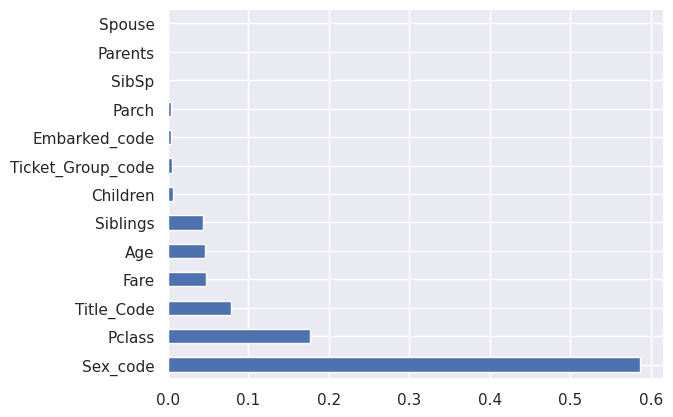

In [ ]:
importances = pd.Series(best_gb.feature_importances_, index=features)
importances.sort_values(ascending=False).plot(kind='barh')

<Axes: >

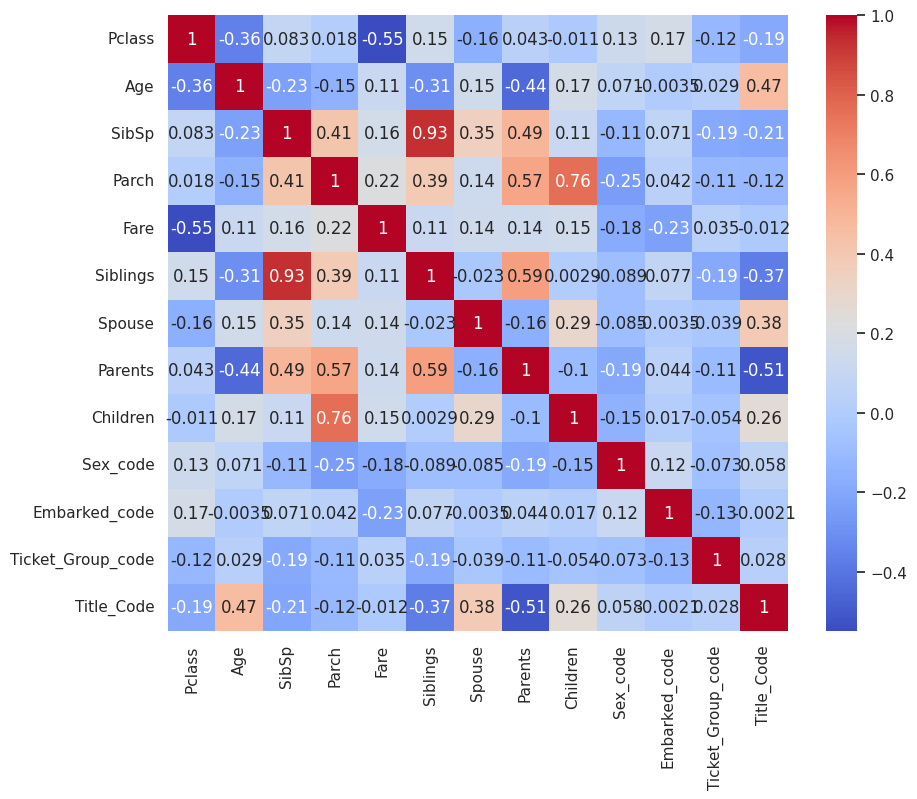

In [ ]:
corr = df_train[features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Changing features selected - GB Tree 2
Score: 0.77033

Removed variables: Parch, Parents, Spouse

In [ ]:
# Select features
features = ['Pclass', 'Age', 'SibSp', 'Fare', 'Siblings', 'Children', 'Sex_code', 'Embarked_code', 'Ticket_Group_code', 'Title_Code']
X = df_train[features]
y = df_train['Survived']

# Split data into 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search_gb.fit(X_train, y_train)

# Best model and evaluation
best_gb = grid_search_gb.best_estimator_
print("Best Params:", grid_search_gb.best_params_)
print(f"Best CV Accuracy: {grid_search_gb.best_score_:.3f}")

# Evaluate on validation set
y_val_pred = best_gb.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (holdout set): {val_acc:.3f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Accuracy: 0.846
Validation Accuracy (holdout set): 0.838


In [ ]:
# Make predictions on test data
df_test['Survived_GB'] = best_gb.predict(df_test[features])

# Export df_test PassengerId and Survived
df_test[['PassengerId', 'Survived_GB']].to_csv('GB_predictions.csv', index=False)

# Export df_test
df_test.to_csv('df_test.csv', index=False)

### Extra Trees
Score: 0.78468

In [ ]:
# Select features
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Siblings', 'Spouse', 'Parents','Children', 'Sex_code', 'Embarked_code', 'Ticket_Group_code', 'Title_Code']
X = df_train[features]
y = df_train['Survived']

# Split data into 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the model
et = ExtraTreesClassifier(random_state=42)

# Set up GridSearchCV
grid_search_et = GridSearchCV(
    estimator=et,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search_et.fit(X_train, y_train)

# Best model and evaluation
best_et = grid_search_et.best_estimator_
print("Best Params:", grid_search_et.best_params_)
print(f"Best CV Accuracy: {grid_search_et.best_score_:.3f}")

# Evaluate on validation set
y_val_pred = best_et.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (holdout set): {val_acc:.3f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best CV Accuracy: 0.833
Validation Accuracy (holdout set): 0.816


In [ ]:
# Make predictions on test data
df_test['Survived_ET'] = best_et.predict(df_test[features])

# Export df_test PassengerId and Survived
df_test[['PassengerId', 'Survived_ET']].to_csv('ET_predictions.csv', index=False)

# Export df_test
df_test.to_csv('df_test.csv', index=False)

### Experimenting with Gini vs Entropy vs Log-loss on the ET model
Score: 0.78468

In [ ]:
# Best-found fixed parameters
base_params = {
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'n_estimators': 100
}

# Criteria to test
criteria = ['gini', 'entropy', 'log_loss']
results = []

# Evaluate each criterion
for crit in criteria:
    model = ExtraTreesClassifier(criterion=crit, **base_params)

    # Cross-validation accuracy (mean of 5-fold)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = np.mean(cv_scores)

    # Fit on full training data and evaluate on validation set
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)

    results.append((crit, cv_mean, val_acc))

# Print results
for crit, cv_acc, val_acc in results:
    print(f"Criterion: {crit:8s} | CV Accuracy: {cv_acc:.3f} | Validation Accuracy: {val_acc:.3f}")

Criterion: gini     | CV Accuracy: 0.831 | Validation Accuracy: 0.827
Criterion: entropy  | CV Accuracy: 0.827 | Validation Accuracy: 0.821
Criterion: log_loss | CV Accuracy: 0.827 | Validation Accuracy: 0.821


In [ ]:
gini_params = {
    'criterion': 'gini',
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'n_estimators': 100,
    'random_state': 42
}

# Train model on full training set
et_gini = ExtraTreesClassifier(**gini_params)
et_gini.fit(X_train, y_train)

# Make predictions on test data
df_test['Survived_ET_gini'] = et_gini.predict(df_test[features])

# Export predictions (PassengerId + Survived column)
df_test[['PassengerId', 'Survived_ET']].to_csv('ET_gini_predictions.csv', index=False)

### Random Forest using Gini criterion
Score: 0.78229

In [ ]:
# Random forest to predict Survived using training dataset

# Train model
rf_model = RandomForestClassifier(n_estimators=100, max_depth = 5, min_samples_split = 10, min_samples_leaf = 10, random_state=42, criterion='gini')
rf_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.3f}")
print(classification_report(y_val, y_val_pred))

y_train_pred = rf_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.3f}")

Validation Accuracy: 0.799
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       110
         1.0       0.81      0.62      0.70        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179

Training Accuracy: 0.857


In [ ]:
# Make predictions on test data
df_test['Survived_RF_gini'] = rf_model.predict(df_test[features])

# Export predictions (PassengerId + Survived column)
df_test[['PassengerId', 'Survived_RF_gini']].to_csv('RF_gini_predictions.csv', index=False)